In [1]:
  # This code is copied from -> https://colab.research.google.com/drive/1ku3LvrqovKOzeCTkW6bLHYxNKMaG4KFv
  # https://www.youtube.com/watch?v=HNwcN3RHcNI
  
  import numpy as np

  # Activation Functions
  def tanh(x):
      return np.tanh(x)

  def d_tanh(x):
      return 1 - np.square(np.tanh(x))

  def sigmoid(x):
      return 1/(1 + np.exp(-x))

  def d_sigmoid(x):
      return (1 - sigmoid(x)) * sigmoid(x)

  # Loss Functions 
  def logloss(y, a):
      return -(y*np.log(a) + (1-y)*np.log(1-a))

  def d_logloss(y, a):
      return (a - y)/(a*(1 - a))	

In [2]:
# The layer class
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

Loss :  18.034093613752702
Loss :  17.38468911037365
Loss :  16.79654977782951
Loss :  16.267319272262625
Loss :  15.793956679343921
Loss :  15.372886624009562
Loss :  15.000161679537655
Loss :  14.671622913312591
Loss :  14.38304696788818
Loss :  14.130271663658908
Loss :  13.909295898368516
Loss :  13.716352965119013
Loss :  13.547958943874615
Loss :  13.400939434100929
Loss :  13.27243867223789
Loss :  13.15991520437302
Loss :  13.0611279767689
Loss :  12.974116158556964
Loss :  12.897175371194509
Loss :  12.828832368616043
Loss :  12.767819648377372
Loss :  12.713051003641054
Loss :  12.663598653610057
Loss :  12.618672308722788
Loss :  12.577600323424974
Loss :  12.539812948737316
Loss :  12.504827604897532
Loss :  12.472236038652024
Loss :  12.441693200114768
Loss :  12.412907662500926
Loss :  12.385633408422411
Loss :  12.359662814353767
Loss :  12.334820677165222
Loss :  12.310959141078028
Loss :  12.28795339855212
Loss :  12.265698053522835
Loss :  12.244104049488513
Loss :  1

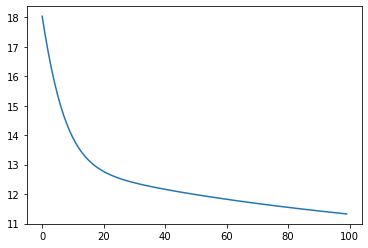

In [3]:
import pandas as pd
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing

dataset = pd.read_csv("heart.csv")

y=dataset.target.to_numpy()
x=dataset.drop('target',axis=1).to_numpy()

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=4)


x_train = x_train.T
x_test = x_test.T
y_train = y_train
y_test = y_test

x_train.shape

m = 13
epochs = 100

layers = [Layer(13, 5, 'sigmoid'), Layer(5, 1, 'sigmoid')]
costs_train = [] # to plot graph 
costs_test = [] # to plot graph 

for epoch in range(epochs):
    A = x_test
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_test, A))
    print("Loss : " , cost )
    costs_train.append(cost)

    dA = d_logloss(y_test, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

import matplotlib.pyplot as plt
plt.plot(range(epochs), costs_train)
